# Systematic uncertainties - background fit example

Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

### (1) Definition of background model

Consider controlled parameter range is [0,1]

In [2]:
# True background distribution

def mybg(x):
    
    bg = 10.0 - 2* x + x*x
    
    return bg

### (2) Definition of fit model

In [3]:
# Basic functions:  1, x, x^2, x^3 ...

def myfun(x,ifun):

    return np.power(x,ifun)

# Full model

def mymodel(x,par):

    val = np.zeros(x.size)
    
    for ip in range(par.size):
        val+=par[ip]*myfun(x,ip)
        
    return val

### (3) Generate pseudo data to fit

In [4]:
# Considered values of x

xvec = np.linspace(0.025,0.975,20)

# Measurement precision
# Assume background is measured with precision ten time better than in the actual experiment

#  svec = np.linspace(2.,4.,xvec.size)  # used for the actual experiment

svec = np.linspace(0.2,0.4,xvec.size)

s2vec = svec*svec

# Pseudo-data

yvec = np.random.normal(mybg(xvec),svec)


### (4)  Linear fit

In [5]:
# Number of model functions to consider 

Nfun = 3

A = np.zeros((Nfun,Nfun))

B = np.zeros(Nfun)

for l in range(Nfun):
    fl = myfun(xvec,l)
    B[l] = np.sum(fl*yvec/s2vec)
    for k in range(Nfun):
        fk = myfun(xvec,k)
        A[l,k] = np.sum(fl*fk/s2vec)


In [6]:
# Inverse of matrix

Cov = np.linalg.inv(A)

# Solution to the problem

par = Cov @ B

# Parameter uncertainties

epar = np.sqrt(np.diagonal(Cov))

print("\n Fit results:\n\n     par         sigma_p\n")

for ip in range(par.size):
    print("  %8.3f  +/- %6.3f " % (par[ip],epar[ip]))

# Calculate correlation matrix, including rounding

Corr = np.array(Cov)

print("\n Correlation matrix\n")
for ip in range(par.size):
    for jp in range(par.size):
        Corr[ip,jp]=int(1000.*Corr[ip,jp]/epar[ip]/epar[jp]+0.5)/1000.
        
    print(Corr[ip,:])

# Fitted function

fvec = mymodel(xvec,par) 

# Chi^2 printout

chi2 = np.sum((yvec-fvec)**2/s2vec)

print("\n chi^2 =  %8.3f   chi^2/Ndf = %8.5f " % (chi2,chi2/(xvec.size-Nfun)))

# print("\n  x       y        sigma_y ")
# for ix in range(xvec.size):
#      print("%6.3f  %8.5f  %8.5f " % (xvec[ix],yvec[ix],svec[ix]))



 Fit results:

     par         sigma_p

     9.921  +/-  0.151 
    -1.816  +/-  0.825 
     0.848  +/-  0.878 

 Correlation matrix

[ 1.    -0.837  0.709]
[-0.837  1.    -0.961]
[ 0.709 -0.961  1.   ]

 chi^2 =    14.859   chi^2/Ndf =  0.87404 


### (5) Draw background data and fit

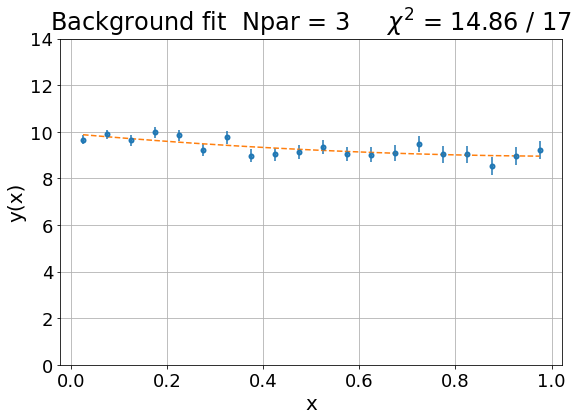

In [9]:
plt.figure(figsize=(9, 6))

plt.errorbar(xvec,yvec,svec, linestyle='none', marker='o', ms=2, mew=4)

plt.plot(xvec,fvec,'--')

plt.title('Background fit  Npar = '+str(Nfun)+'     $\chi^{2}$ = '+str(int(100*chi2+0.5)/100.)+' / '+str(xvec.size-Nfun),size=24)
plt.xlabel('x',size=20)
plt.ylabel('y(x)',size=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([0.,14.])
plt.grid(which='major', axis='both')

fname = '10_bg_fit_'+str(Nfun)+'.png'
plt.savefig(fname)

### (6) Save fit parameters and covariance matris

In [10]:
parfile = "10_bg_fit_par_"+str(Nfun)+".dat"
covfile = "10_bg_fit_cov_"+str(Nfun)+".dat"

# Store only relevant vectors

par.tofile(parfile," ","%12.8f")
Cov.tofile(covfile," ","%12.8f")